<a href="https://colab.research.google.com/github/heytanay/cnn-mnist/blob/master/CNN_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
from matplotlib import pyplot as plt 

In [0]:
from tensorflow.examples.tutorials.mnist import input_data

In [6]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

W0727 12:53:53.413724 140179722250112 deprecation.py:323] From <ipython-input-6-a839aeb82f4b>:1: read_data_sets (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
W0727 12:53:53.420522 140179722250112 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:260: maybe_download (from tensorflow.contrib.learn.python.learn.datasets.base) is deprecated and will be removed in a future version.
Instructions for updating:
Please write your own downloading logic.
W0727 12:53:53.424696 140179722250112 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/base.py:252: _internal_retry.<locals>.wrap.<locals>.wrapped_fn (from tensorflow.contrib.learn.python.learn.datasets.base) is deprecated and will be removed

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz


W0727 12:53:54.111077 140179722250112 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:267: extract_labels (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use tf.data to implement this functionality.
W0727 12:53:54.118395 140179722250112 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:110: dense_to_one_hot (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use tf.one_hot on tensors.
W0727 12:53:54.286517 140179722250112 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:290: DataSet.__init__ (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be remove

Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [7]:
type(mnist)

tensorflow.contrib.learn.python.learn.datasets.base.Datasets

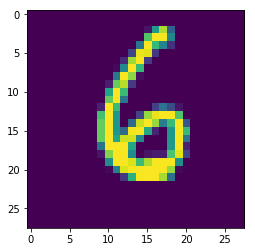

In [20]:
plt.imshow(mnist.test.images[91].reshape(28,28))

In [0]:
def init_weights(shape):
    random_dist = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(random_dist)

In [0]:
def init_bias(shape):
    bias_val = tf.constant(0.1,shape=shape)
    return tf.Variable(bias_val)

In [0]:
# Convolution 2D
def conv2d(X, W):
    # X -> Input Tensor => [Batch, Height, Width, Channels]
    # W -> Weights Tensor => [filter of Height, filter of Width, Channels Input, Channels Ouput]

    return tf.nn.conv2d(X, W, strides=[1,1,1,1], padding='SAME')

In [0]:
# Pooling Layer
def max_pool_2b2(X):
    # X -> Input Tensor => [Batch, height, width, channel]
    return tf.nn.max_pool(X, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')

In [0]:
# Convolutional Layer Initializer
def convolutional_layer(input_x, shape):
    W = init_weights(shape)
    b = init_bias([shape[3]])
    return tf.nn.relu(conv2d(input_x, W)+b)

In [0]:
# Fully Connected Layer
def dense_layer(input_layer, size):
    input_size = int(input_layer.get_shape()[1])
    W = init_weights([input_size, size])
    b = init_bias([size])

    return tf.matmul(input_layer, W) + b

In [0]:
# Placeholders
X = tf.placeholder(tf.float32, shape=[None, 784])
Y_true = tf.placeholder(tf.float32, shape=[None, 10])

In [0]:
x_image = tf.reshape(X, [-1,28,28,1])

In [0]:
convo_1 = convolutional_layer(x_image, shape=[5,5,1,32])
convo_1_pooling = max_pool_2b2(convo_1)

In [0]:
convo_2 = convolutional_layer(convo_1_pooling, shape=[5,5,32,64])
convo_2_pooling = max_pool_2b2(convo_2)

In [0]:
convo_3 = convolutional_layer(convo_2_pooling, shape=[5,5,64,128])
convo_3_pooling = max_pool_2b2(convo_3)

In [0]:
convo_2_flat = tf.reshape(convo_2_pooling, [-1,7*7*64])
full_layer_one = tf.nn.relu(dense_layer(convo_2_flat, 1024))

In [0]:
# Dropout
hold_prob = tf.placeholder(tf.float32)
full_one_drop = tf.nn.dropout(full_layer_one, rate=1-hold_prob)

In [0]:
Y_pred = dense_layer(full_one_drop, 10)

In [0]:
# Loss
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=Y_true, logits=Y_pred))

In [0]:
# Optimizer
optimizer = tf.train.AdamOptimizer(learning_rate=0.001)
train = optimizer.minimize(cross_entropy)

In [0]:
init = tf.global_variables_initializer()

In [0]:
epochs = 10000
accuracies = list()

In [94]:
with tf.Session() as sess:
    sess.run(init)

    for i in range(epochs):
        batch_x, batch_y = mnist.train.next_batch(50)

        sess.run(train, feed_dict={X:batch_x, Y_true:batch_y, hold_prob:0.5})

        if i % 100 == 0:
            matches = tf.equal(tf.argmax(Y_pred, 1), tf.argmax(Y_true, 1))
            accuracy = tf.reduce_mean(tf.cast(matches, tf.float32))
            present_acc = sess.run(accuracy, feed_dict={X: mnist.test.images, Y_true: mnist.test.labels, hold_prob: 1.0})
            print("At epoch:{}, Accuracy is: {}".format(i, present_acc))
            accuracies.append(present_acc)         
            


At epoch:0, Accuracy is: 0.15649999678134918
At epoch:100, Accuracy is: 0.9416000247001648
At epoch:200, Accuracy is: 0.9663000106811523
At epoch:300, Accuracy is: 0.9708999991416931
At epoch:400, Accuracy is: 0.9731000065803528
At epoch:500, Accuracy is: 0.9789999723434448
At epoch:600, Accuracy is: 0.9753999710083008
At epoch:700, Accuracy is: 0.9807000160217285
At epoch:800, Accuracy is: 0.982200026512146
At epoch:900, Accuracy is: 0.9824000000953674
At epoch:1000, Accuracy is: 0.984499990940094
At epoch:1100, Accuracy is: 0.9851999878883362
At epoch:1200, Accuracy is: 0.984000027179718
At epoch:1300, Accuracy is: 0.9843000173568726
At epoch:1400, Accuracy is: 0.9873999953269958
At epoch:1500, Accuracy is: 0.9855999946594238
At epoch:1600, Accuracy is: 0.98580002784729
At epoch:1700, Accuracy is: 0.9865000247955322
At epoch:1800, Accuracy is: 0.9872000217437744
At epoch:1900, Accuracy is: 0.9876999855041504
At epoch:2000, Accuracy is: 0.9883000254631042
At epoch:2100, Accuracy is: 0

KeyboardInterrupt: ignored

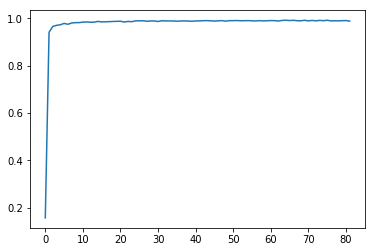

In [96]:
plt.plot(accuracies)